The following assignment consists again of a theoretical part (learning portfolio) and a practical part (assignment). The goal is to train a neural model from scratch, as we did a few weeks ago. I would like us to repeat the most important things so that we can consolidate our knowledge in this area, for this you will train a model on a dataset that I will provide via OLAT. 

The plan would be that in the first we will discuss your learnings from the theory part, that means you are relatively free to fill your Learning Portfolio on this topic and in the following week we will discuss your solutions of the Classification Model.

#Theory part (filling your Learning Portfolio, May 24)

In preparation for the practical part, I ask you to familiarize yourself with the following video sources in the next week:

1) Please watch the following video until random forests:

https://course.fast.ai/Lessons/lesson5.html

2) Please download the following notebooks and edit it in Google-Colab. Take notes and update your Learning Portfolio.

https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch

https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework

The contents should be mostly known to you, because these contents are also based on chapter 4, which we have already worked on. We repeat the basics again with a new data set to consolidate our knowledge.



#Practical part (Assignment, May 31)

The following task is a binary classification task. The first column is our target. All variables are categorical variables from which you have to create dummy variables. The target column has only the property Q or F, which is to be modeled. As always, please create a train and a test data set, e.g. 80:20 or 90:10. Your goal is to create a neural network that best predicts the target column. Use probabilities with the sigmoid function as discussed in the theory. When designing your neural network, play with a few different numbers and sizes of layers and different activation functions.

To validate your model, you can compare your results with a logistic regression model. (Note: This data set should allow you to achieve very high accuracies: > 98% maybe even >99%) You can see how these results vary when you use 50% for testing and 50% for training.

In [75]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
data_table.enable_dataframe_formatter()

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *


drive.mount('/content/gdrive', force_remount=True)

fastbook.setup_book()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_homework_6.csv")

data.head(10)

Mounted at /content/gdrive
Mounted at /content/drive


,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
0,Q,Y,T,O,U,Q,G,D,O,L,F,F,T,T,X,X,Q,X,P,Q,L,T,V
1,F,Y,T,Z,U,B,G,D,C,L,F,D,T,T,X,X,Q,X,P,Q,O,O,H
2,F,C,T,X,U,M,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,O,O,N
3,Q,Y,Z,X,U,Q,G,D,O,O,F,F,T,T,X,X,Q,X,P,Q,L,T,V
4,F,Y,T,H,G,O,G,X,C,L,U,F,T,T,X,X,Q,X,P,F,O,B,H
5,F,Y,Z,Z,U,B,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,L,O,H
6,F,C,T,X,U,B,G,D,C,H,F,D,T,T,X,X,Q,X,P,Q,L,O,N
7,F,C,Z,X,U,M,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,O,T,N
8,Q,Y,Z,X,U,Q,G,D,O,Q,F,F,T,T,X,X,Q,X,P,Q,L,W,H
9,F,C,T,Z,U,B,G,D,C,H,F,D,T,T,X,X,Q,X,P,Q,L,T,N


When we have discussed the assignment, I will tell you what the data set is about, which has its origin from our nature.

In [76]:
if data.isna().sum().any() != 0:
  print("Amount of missing values " , data.isna().sum())
else:
  print("No missing values")

No missing values


In [77]:
def transform_labels(data):
  data['target'] = data['target'].map({"F": 0, "Q":1})
  return data

In [78]:
#OneHotEncoder to convert numerical attributes to torch tensors

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, [col for col in data.columns if col != "target"]),
        ("label", FunctionTransformer(transform_labels), ["target"])
    ]
)




In [79]:
data_prepared = pd.DataFrame(preprocessing.fit_transform(data).toarray())
#data_prepared = preprocessing.fit_transform(data)
data_prepared

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

##### Split Dataset

In [80]:
train_data, test_data = train_test_split(data_prepared, test_size=0.1, random_state=42)
#Validation data
train_data, validation_data = train_test_split(train_data, test_size=0.1, random_state=42)

print("Dataset Length: ",len(train_data),len(test_data), len(validation_data))

Dataset Length:  6579 813 732


In [81]:
def split_data_label(x):
  data_label = x[117].copy()
  x = x.drop([117], axis=1)
  return x, data_label

In [82]:
train_data, train_label = split_data_label(train_data)
test_data, test_label = split_data_label(test_data)
validation_data, validation_label = split_data_label(validation_data)


#### NN Training 

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 3782 to 1082
Columns: 117 entries, 0 to 116
dtypes: float64(117)
memory usage: 5.9 MB


In [84]:
#Creating Tensors for training
tensor_train_data = torch.from_numpy(train_data.values)
tensor_train_label = torch.tensor(train_label.values).squeeze()
tensor_valid_data = torch.from_numpy(validation_data.values)
tensor_valid_label = torch.tensor(validation_label.values).squeeze()

tensor_train_data = tensor_train_data.float()
tensor_train_label = tensor_train_label.float()
tensor_valid_data = tensor_valid_data.float()
tensor_valid_label = tensor_valid_label.float()

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.498417,0.499165,0.508661,00:00
1,0.498405,0.499157,0.508661,00:00
2,0.498392,0.499149,0.508661,00:00
3,0.498378,0.499141,0.508661,00:00
4,0.498363,0.499133,0.508661,00:00
5,0.498349,0.499126,0.508497,00:00
6,0.498334,0.499118,0.508497,00:00
7,0.498319,0.499110,0.508497,00:00
8,0.498304,0.499102,0.508497,00:00
9,0.498289,0.499095,0.508361,00:00


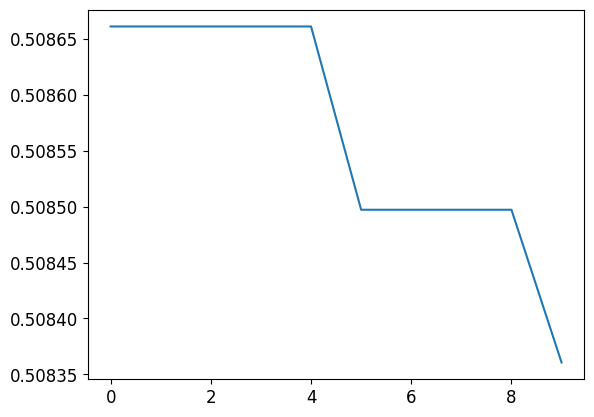

In [95]:
# Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

#Simple NN with three layers and ReLu Activation Function
simple_net = nn.Sequential(
    nn.Linear(117,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

#Loss Function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# Loss function: Root Mean Squared Error
'''def rmse(predictions, targets):
    predictions = predictions.sigmoid()
    predictions=predictions.squeeze()
    squared_diff = torch.pow(predictions - targets, 2)
    mean_squared_diff = torch.mean(squared_diff)
    rmse = torch.sqrt(mean_squared_diff)

    return rmse'''




# 5.1 Calculate Validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.double().mean()

#Initializes DataLoader for creating "train" mini batches
dl = DataLoader(list(zip(tensor_train_data,tensor_train_label)), batch_size=100)
xb,yb = first(dl)
xb.shape,yb.shape

#Initializes DataLoader for creating "valid" mini batches
valid_dl = DataLoader(list(zip(tensor_valid_data,tensor_valid_label)), batch_size=100)
xb,yb = first(dl)
xb.shape,yb.shape


#Optimizer 
learn = Learner(DataLoaders(dl, valid_dl), simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

#lr = 1.0
learn.fit(10, )

plt.plot(L(learn.recorder.values).itemgot(2));

